In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
pd.set_option('display.max_columns', 500)
import seaborn as sns

/tmp/ipykernel_20697/3784489319.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [66]:
from cdcp.paths import DATA_PATH_MAGPI, FIGURE_DIR, ensure_dir
from cdcp.general import save_fig

In [3]:
from cdcp.experiment_info import subjects
from cdcp.paths import DATA_PATH_MAGPI, DATA_DIR
from cdcp.behavior.data import prepare_behavior_data
from cdcp.visualization.colors import colors
subjects, DATA_PATH_MAGPI

(('B1174',
  'B1426',
  'B1170',
  'B1432',
  'B1437',
  'B1433',
  'B1597',
  'B1427',
  'B1188',
  'B1244',
  'B1590',
  'B1399',
  'B1591',
  'B1252',
  'B1110',
  'B1390',
  'B1248',
  'B1593',
  'B1595',
  'B1276'),
 PosixPath('/mnt/cube/RawData/Magpi'))

In [4]:
# pickled dataframes
stim_df = pd.read_pickle(DATA_DIR / 'stimuli' / 'stim_df.pickle.zip' , compression='zip')

In [5]:
stim_df[:3]

,stims,idx,z,x,recon_x,syll_wav,wav_file,stim_length,syll_start,bird,datetime,generated_audio
A,A,0,"[-1.5310783386230469, 0.15899673104286194, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.354109710722696e-05, 2.357472340008826e-06,...","[-18, -21, -18, -19, -23, -16, -15, -24, -17, ...",../../data/interim/st_wavs/b1077/wavs/2018-01-...,0.606612,1853779.625,b1077,05/01/18 13:33:29.485819,"[6, 2, -5, -7, -12, -5, 0, 1, 13, 2, 6, 20, 24..."
B,B,1,"[1.0914186239242554, -0.4693475067615509, -1.8...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.042301386813051e-06, 7.268283184203028e-07,...","[-69, -71, -58, -53, -42, -45, -37, -50, -64, ...",../../data/interim/st_wavs/b1159/wavs/2018-04-...,0.311291,1481033.000,b1159,21/04/18 18:13:16.363514,"[-2, 0, -16, -54, -57, -23, -42, -44, -62, -49..."
C,C,2,"[1.3686274290084839, 1.2882750034332275, -0.63...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.574187132926454e-07, 4.783260010299273e-08,...","[22, 20, 26, 25, 15, 12, 12, 15, 15, 26, 34, 2...",../../data/interim/st_wavs/B338/wavs/2008-05-0...,0.309285,1494092.875,B338,04/05/08 18:56:33.879657,"[0, 3, 6, 0, 2, 4, 14, 19, 20, 22, 27, 28, 27,..."


In [31]:
stim_df.stims.values

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'CR0', 'CR1', 'CN', 'CL0',
       'CL1'], dtype=object)

In [6]:
stims = ['CR0', 'CR1', 'CN', 'CL0', 'CL1'] # 'D', 'H', 

In [7]:
len(stims)

5

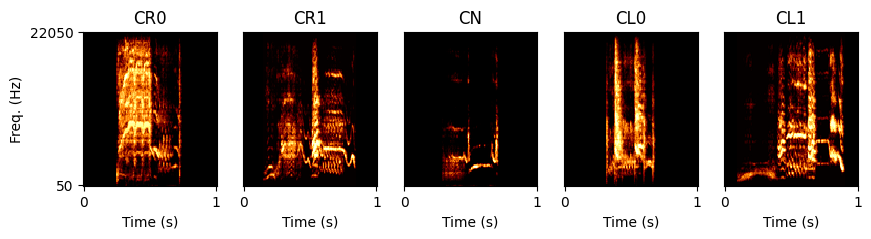

In [8]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(5*2,2))

i = 0
for idx, row in stim_df.iterrows():
    if row.stims not in stims:
        continue
    
    ax = axs.flatten()[i]
    ax.set_title(row.stims)
    ax.matshow(row.x.reshape(128,128), origin = 'lower', cmap = plt.cm.afmhot, aspect='auto')
    ax.set_xticks([0,127])
    ax.set_xticklabels([0,1])
    if i ==0:
        ax.set_yticks([0,127])
        ax.set_yticklabels([50,22050])
        ax.set_ylabel('Freq. (Hz)')

    else: 
        ax.set_yticks([])
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xlabel('Time (s)')
    i += 1
plt.show()

In [20]:
n_interp = 8

In [29]:
interp_df_subset

,L,R,prop,pt,z,x_x_interp,x_z_interp,audio,interp
3328,D,G,0.000000,0,"[2.2567455768585205, 0.48153558373451233, 1.16...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[7.43077350762178e-07, 3.586017172096945e-08, ...","[9, -6, -11, -6, 3, 6, 1, 0, -10, -13, -20, -1...",D_G
3329,D,G,0.007874,1,"[2.2447884824332287, 0.4725517057997035, 1.151...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[8.299719524984539e-07, 4.230900785273661e-08,...","[-7, -3, -2, -11, -16, -16, -14, -4, 4, 1, -15...",D_G
3330,D,G,0.015748,2,"[2.232831388007938, 0.46356782786489475, 1.138...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.297266387875425e-07, 5.001467329179832e-08,...","[7, -4, 19, 20, 17, 18, 23, 21, 23, 20, 22, 24...",D_G
3331,D,G,0.023622,3,"[2.220874293582646, 0.45458394993008594, 1.126...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0358494364481885e-06, 5.893135224255275e-08...","[-3, 7, 1, 14, 21, 11, 13, 6, 13, 21, 19, 7, -...",D_G
3332,D,G,0.031496,4,"[2.2089171991573546, 0.4456000719952772, 1.114...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.1450049441918964e-06, 6.904572558141808e-08...","[8, 21, 16, 15, 12, 22, 34, 23, 27, 29, 23, 13...",D_G
...,...,...,...,...,...,...,...,...,...
3451,D,G,0.968504,123,"[0.7860229625476628, -0.6234814022469707, -0.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.4439564210988465e-07, 1.0717224441236795e-0...","[-2, -3, 6, 2, -9, -3, 13, 36, 34, 31, 15, 27,...",D_G
3452,D,G,0.976378,124,"[0.7740658681223711, -0.6324652801817796, -0.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.259676736253823e-07, 9.057623095998224e-09,...","[6, 20, 30, 36, 44, 48, 46, 48, 54, 67, 58, 53...",D_G
3453,D,G,0.984252,125,"[0.7621087736970795, -0.6414491581165885, -0.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0989620591317362e-07, 7.6758235323382e-09, ...","[6, 12, 30, 35, 10, 19, 32, 24, 32, 24, 15, 9,...",D_G
3454,D,G,0.992126,126,"[0.750151679271788, -0.6504330360513972, -0.36...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.612084284071898e-08, 6.5486456257701775e-09...","[-14, -9, -18, -29, -22, -1, 1, -2, 6, 16, 33,...",D_G


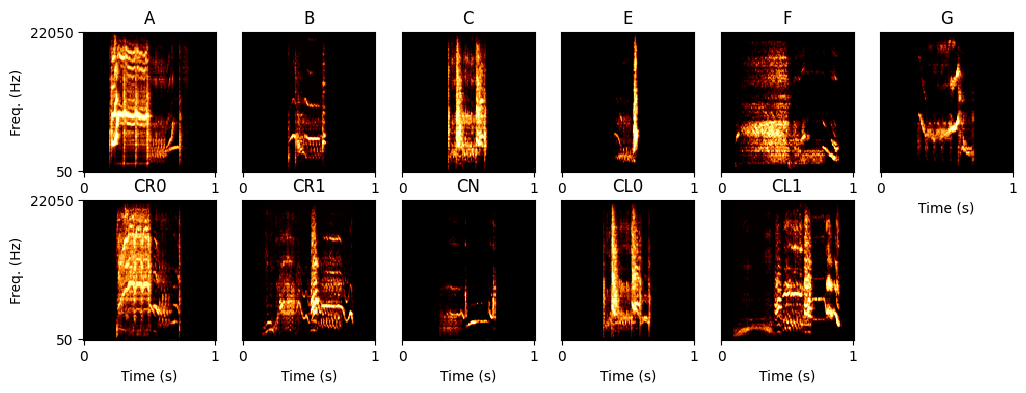

In [67]:
stims = ['A', 'B', 'C',  'E', 'F', 'G', 'CR0', 'CR1', 'CN', 'CL0',
       'CL1']
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(6*2,4))

i = 0
for idx, row in stim_df.iterrows():
    if row.stims not in stims:
        continue
    
    ax = axs.flatten()[i]
    ax.set_title(row.stims)
    ax.matshow(row.x.reshape(128,128), origin = 'lower', cmap = plt.cm.afmhot, aspect='auto')
    ax.set_xticks([0,127])
    ax.set_xticklabels([0,1])
    if i in [0,6]:
        ax.set_yticks([0,127])
        ax.set_yticklabels([50,22050])
        ax.set_ylabel('Freq. (Hz)')

    else: 
        ax.set_yticks([])
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xlabel('Time (s)')
    i += 1
    
axs.flatten()[-1].axis('off')

ensure_dir(FIGURE_DIR / 'stimuli')
save_fig(FIGURE_DIR / 'stimuli' / 'stims', save_pdf=True)

plt.show()

In [47]:
L_STIMS = ['A', 'B', 'C']
R_STIMS = ['E', 'F', 'G']

In [48]:
interp_dfs = np.array(list((DATA_DIR / 'stimuli').glob('interp_df*')))

/n/groups/datta/tim_sainburg/projects/CDCP_paper/data/stimuli/interp_df_A_E.pickle.zip


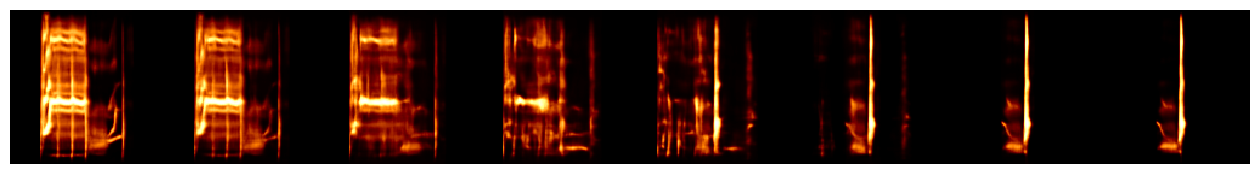

/n/groups/datta/tim_sainburg/projects/CDCP_paper/data/stimuli/interp_df_B_E.pickle.zip


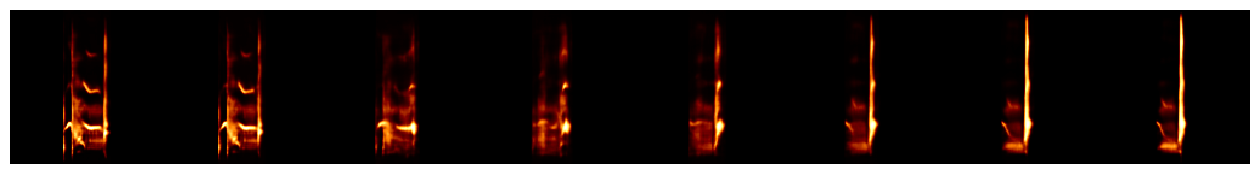

/n/groups/datta/tim_sainburg/projects/CDCP_paper/data/stimuli/interp_df_C_E.pickle.zip


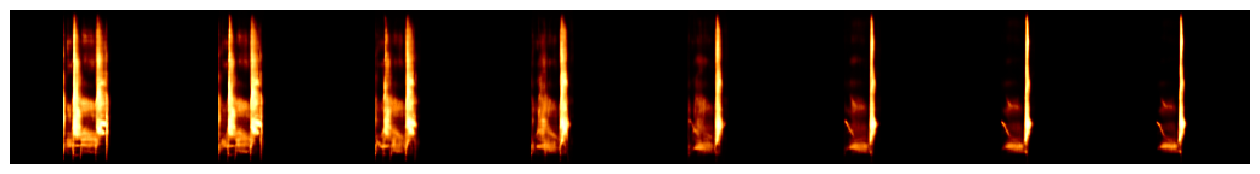

/n/groups/datta/tim_sainburg/projects/CDCP_paper/data/stimuli/interp_df_A_F.pickle.zip


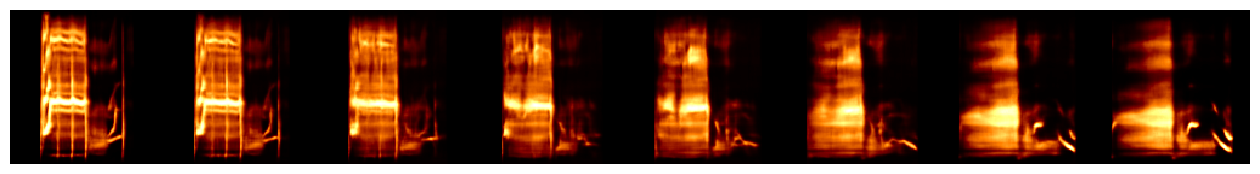

/n/groups/datta/tim_sainburg/projects/CDCP_paper/data/stimuli/interp_df_B_F.pickle.zip


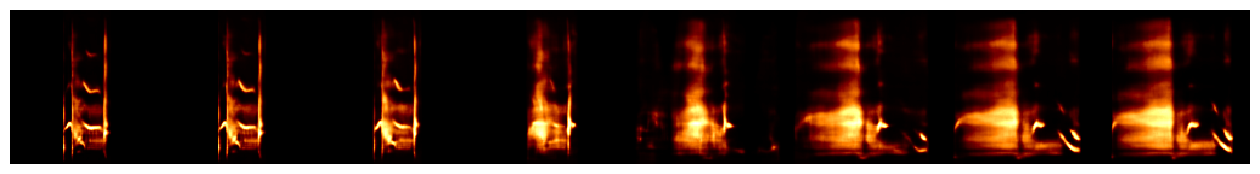

/n/groups/datta/tim_sainburg/projects/CDCP_paper/data/stimuli/interp_df_C_F.pickle.zip


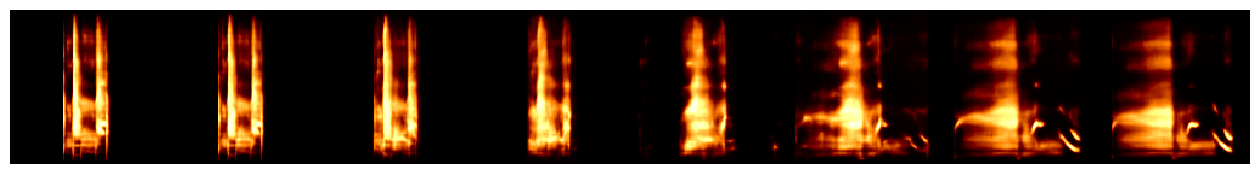

/n/groups/datta/tim_sainburg/projects/CDCP_paper/data/stimuli/interp_df_A_G.pickle.zip


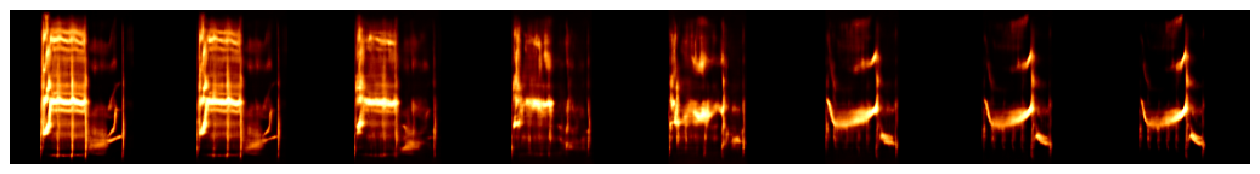

/n/groups/datta/tim_sainburg/projects/CDCP_paper/data/stimuli/interp_df_B_G.pickle.zip


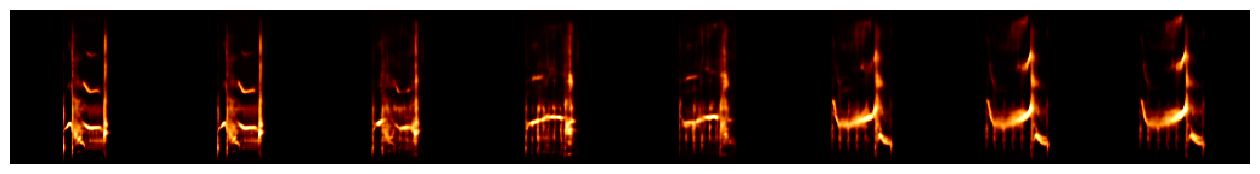

/n/groups/datta/tim_sainburg/projects/CDCP_paper/data/stimuli/interp_df_C_G.pickle.zip


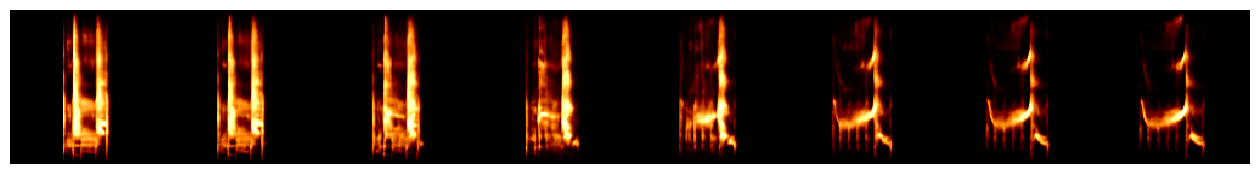

<Figure size 640x480 with 0 Axes>

In [68]:

for RS in R_STIMS:
    for LS in L_STIMS:
        file = interp_dfs[
            (
                (np.array([i.stem[:-7].split("_")[2] for i in interp_dfs]) == LS)
                & (np.array([i.stem[:-7].split("_")[3] for i in interp_dfs]) == RS)
            )
        ][0]
        print(file)
        interp_df_subset = pd.read_pickle(file, compression="zip")

        interp_df_subset_pts = interp_df_subset[
            interp_df_subset.pt.isin(np.linspace(0, 127, n_interp).astype("int"))
        ][::-1]

        fig, axs = plt.subplots(
            ncols=n_interp,
            figsize=(n_interp * 2, 2),
            gridspec_kw={"wspace": 0.0, "hspace": 0.08},
        )
        for i in range(n_interp):
            spec = np.reshape(interp_df_subset_pts.x_z_interp.values[i], (128, 128))
            axs[i].matshow(spec, origin="lower", cmap=plt.cm.afmhot, aspect="auto")
            axs[i].axis("off")

        plt.show()

        # show spectrogram interpolation
        if False:
            spec0 = np.reshape(interp_df_subset_pts.x_x_interp.values[0], (128, 128))
            spec1 = np.reshape(interp_df_subset_pts.x_x_interp.values[-1], (128, 128))
            fig, axs = plt.subplots(
                ncols=n_interp,
                figsize=(n_interp * 2, 2),
                gridspec_kw={"wspace": 0.0, "hspace": 0.08},
            )
            for i, pct in enumerate(np.linspace(0, 1, n_interp)):
                spec = spec1 * pct + spec0 * (1 - pct)
                axs[i].matshow(spec, origin="lower", cmap=plt.cm.afmhot, aspect="auto")
                axs[i].axis("off")
            plt.show()



In [ ]:
ax.set_xticks([0,127])
ax.set_xticklabels([0,1])
if i in [0,6]:
    ax.set_yticks([0,127])
    ax.set_yticklabels([50,22050])
    ax.set_ylabel('Freq. (Hz)')

else: 
    ax.set_yticks([])
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('Time (s)')

/n/groups/datta/tim_sainburg/projects/CDCP_paper/data/stimuli/interp_df_A_E.pickle.zip
/n/groups/datta/tim_sainburg/projects/CDCP_paper/data/stimuli/interp_df_B_E.pickle.zip
/n/groups/datta/tim_sainburg/projects/CDCP_paper/data/stimuli/interp_df_C_E.pickle.zip
/n/groups/datta/tim_sainburg/projects/CDCP_paper/data/stimuli/interp_df_A_F.pickle.zip
/n/groups/datta/tim_sainburg/projects/CDCP_paper/data/stimuli/interp_df_B_F.pickle.zip
/n/groups/datta/tim_sainburg/projects/CDCP_paper/data/stimuli/interp_df_C_F.pickle.zip
/n/groups/datta/tim_sainburg/projects/CDCP_paper/data/stimuli/interp_df_A_G.pickle.zip
/n/groups/datta/tim_sainburg/projects/CDCP_paper/data/stimuli/interp_df_B_G.pickle.zip
/n/groups/datta/tim_sainburg/projects/CDCP_paper/data/stimuli/interp_df_C_G.pickle.zip


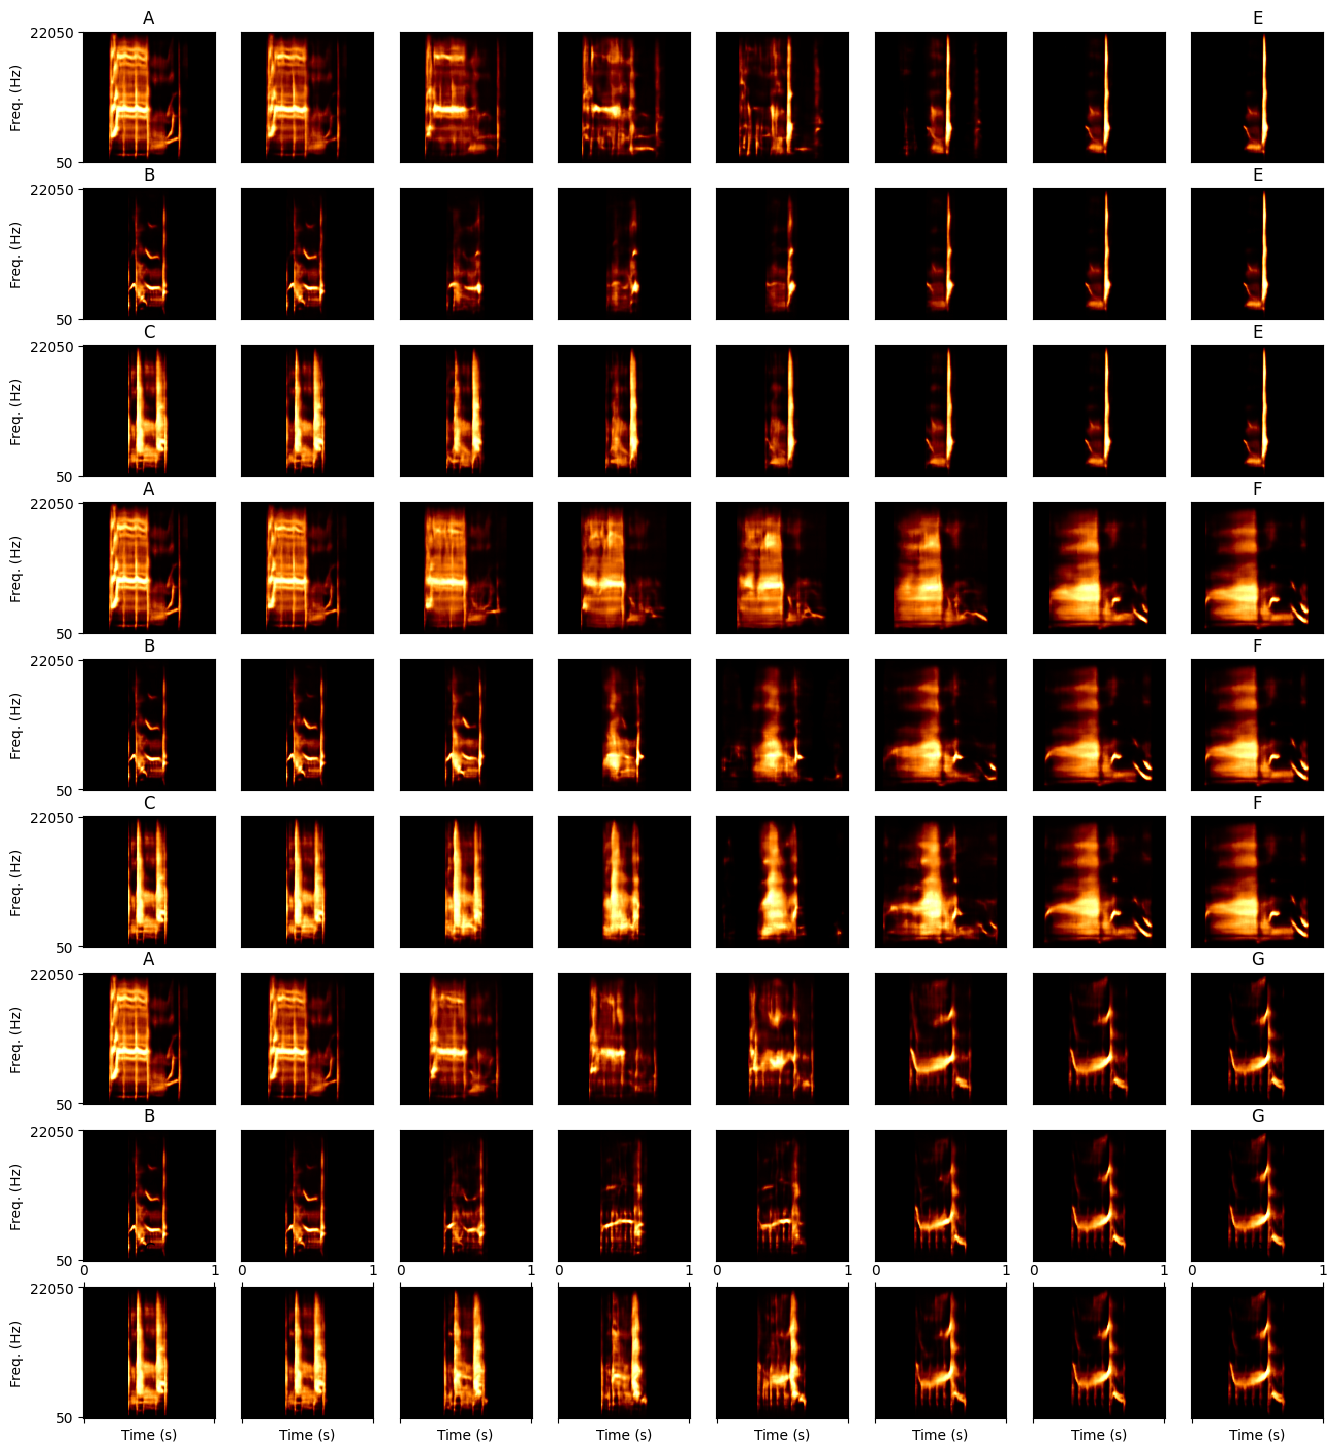

In [69]:
fig, axs1 = plt.subplots(ncols = n_interp, nrows = 9, figsize=(n_interp*2, 9*2))


row = 0
for RS in R_STIMS:
    for LS in L_STIMS:
        file = interp_dfs[
            (
                (np.array([i.stem[:-7].split("_")[2] for i in interp_dfs]) == LS)
                & (np.array([i.stem[:-7].split("_")[3] for i in interp_dfs]) == RS)
            )
        ][0]
        print(file)
        interp_df_subset = pd.read_pickle(file, compression="zip")

        interp_df_subset_pts = interp_df_subset[
            interp_df_subset.pt.isin(np.linspace(0, 127, n_interp).astype("int"))
        ][::-1]

        axs = axs1[row]
        for i in range(n_interp):
            spec = np.reshape(interp_df_subset_pts.x_z_interp.values[i], (128, 128))
            ax = axs[i]
            ax.matshow(spec, origin="lower", cmap=plt.cm.afmhot, aspect="auto")
            
            ax.set_xticks([])
            ax.set_yticks([])
            
            if i ==0:
                # plot name of interp
                ax.set_yticks([0,127])
                ax.set_yticklabels([50,22050])
                ax.set_ylabel('Freq. (Hz)')
                ax.set_title(LS)
                
            if i == n_interp - 1:
                # plot name of interp
                ax.set_title(RS)
                # 
                
            if row == 8:
                # plot time
                ax.set_xticks([0,127])
                ax.set_xticklabels([0,1])
                ax.set_xlabel('Time (s)')
                
        row+=1
        
ensure_dir(FIGURE_DIR / 'stimuli')
save_fig(FIGURE_DIR / 'stimuli' / 'interps', save_pdf=True)

plt.show()